# The Sparks Foundation
## Graduate Rotational Internship Program (GRIP)
### Data Science &Business Analytics Internship
### Auther : Shraddha Tarawade
## Task 2 - Prediction using Unsupervised ML
### Problem Statement : From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.

### 1. Importing the required libraries and Data

In [81]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

# To ignore the warnings 
import warnings as wg
wg.filterwarnings("ignore")

In [82]:
# load datasets
data = pd.read_csv('C:\\Users\shrad\Desktop\Data Science\SparkFoundation\Task2\Iris.csv')
# Printing first 5 rows
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 2. Visualisng the data

In [83]:
# data.info() gives Consize memmory of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [84]:
# data.tail(n) gives last n rows from the data
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [85]:
# data.isnull().sum() gives count of missing values present in each column
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [86]:
# data.describe() gives statistical properties of the data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [87]:
# data.shape gives number of rows and columns in the data
data.shape

(150, 6)

In [88]:
# data['Species'].unique() gives unique Species in data
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [89]:
# data.columns gives column names 
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [90]:
# dropping the label column
iris = pd.DataFrame(data)
iris_data = iris.drop(columns= ['Species' ,'Id'] )
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 3. Determinig the optimum number of clusters using The Elbow Method

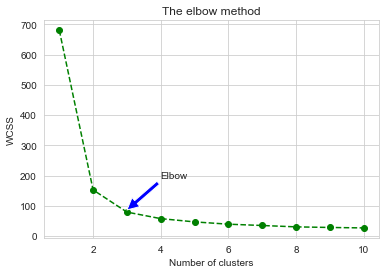

In [91]:
# Finding the optimum number of clusters for k-means classification

x = iris_data.iloc[:, [0, 1, 2, 3]].values

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss, "go--")
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.annotate('Elbow', xytext = (4,190), xy=(3,86), arrowprops = {"facecolor" : "blue"})
plt.show()

### 4. Creating the kmeans classifier and Ploting the clusters

In [92]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

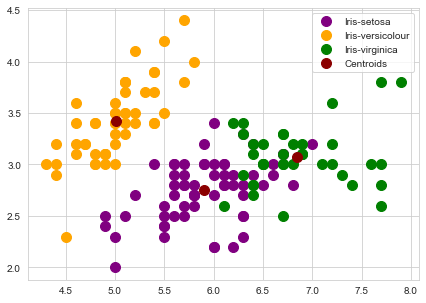

In [93]:
#Visualising the clusters
plt.figure(figsize = (7,5))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'darkred', label = 'Centroids')
plt.legend()

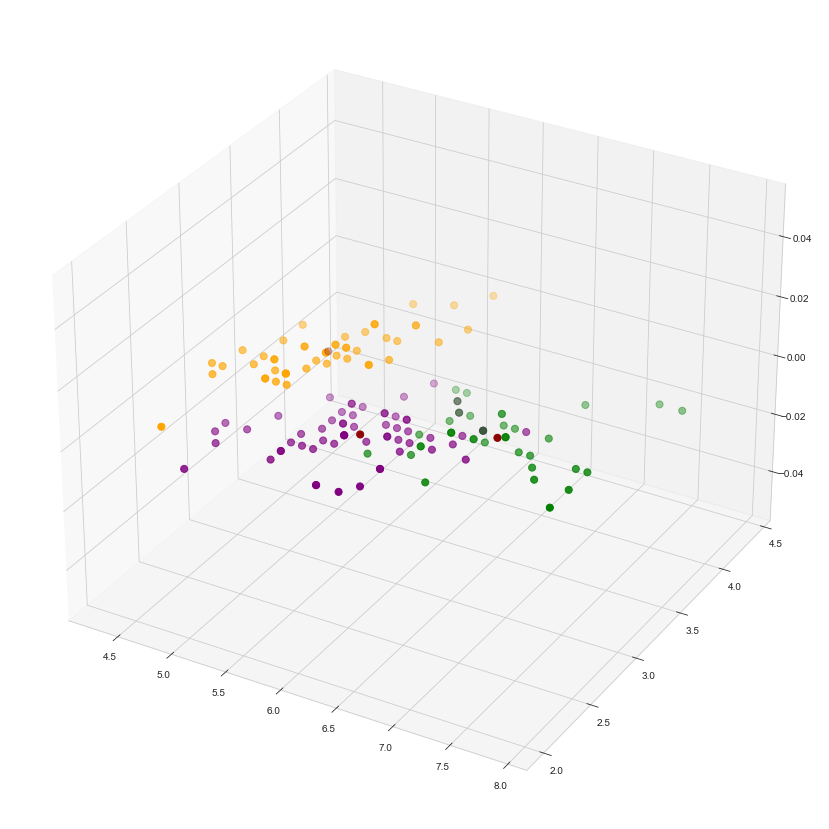

In [94]:
# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'darkred', label = 'Centroids')
plt.show()

### 5. Labeling the predictions and Adding the prediction to the dataset

In [95]:
#considering 0 Corresponds to 'Iris-setosa'
#1 to 'Iris-versicolour'
#2 to 'Iris-virginica'
y_kmeans = np.where(y_kmeans==0, 'Iris-setosa', y_kmeans)
y_kmeans = np.where(y_kmeans=='1', 'Iris-versicolour', y_kmeans)
y_kmeans = np.where(y_kmeans=='2', 'Iris-virginica', y_kmeans)

In [96]:
data_with_clusters = iris_data.copy()
data_with_clusters["Cluster"] = y_kmeans
print(data_with_clusters.head(5))

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm           Cluster
0            5.1           3.5            1.4           0.2  Iris-versicolour
1            4.9           3.0            1.4           0.2  Iris-versicolour
2            4.7           3.2            1.3           0.2  Iris-versicolour
3            4.6           3.1            1.5           0.2  Iris-versicolour
4            5.0           3.6            1.4           0.2  Iris-versicolour


## DATA VISUALISATION
### Plots : 1. Bar Plot - CLUSTER DISTRIBUTION

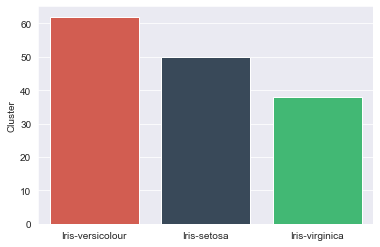

In [97]:
sns.set_style('darkgrid')
sns.barplot(x = data_with_clusters["Cluster"] .unique(),
            y = data_with_clusters["Cluster"] .value_counts(),
            palette=sns.color_palette(["#e74c3c", "#34495e", "#2ecc71"]));

#### Bar Plot Assumption : 
There are around 62 iris-versicolour , 50 Iris-setosa and roughly 38 Iris-virginica samples in the dataset as predicted.

### 2. Violin Plot

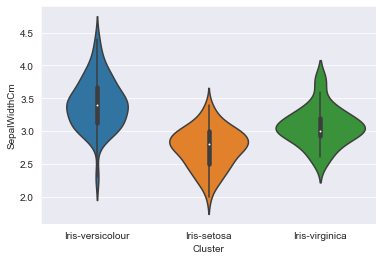

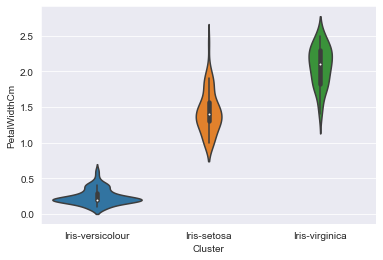

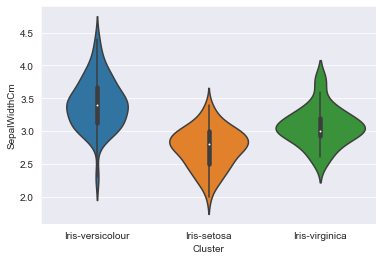

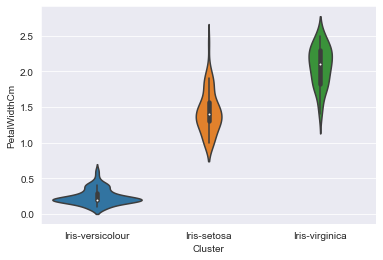

In [98]:
sns.violinplot(x="Cluster", y='SepalWidthCm', data=data_with_clusters)
plt.show()
sns.violinplot(x="Cluster", y='PetalWidthCm', data=data_with_clusters)
plt.show()
sns.violinplot(x="Cluster", y='SepalWidthCm', data=data_with_clusters)
plt.show()
sns.violinplot(x="Cluster", y='PetalWidthCm', data=data_with_clusters)
plt.show()

### 3. Pair Plot

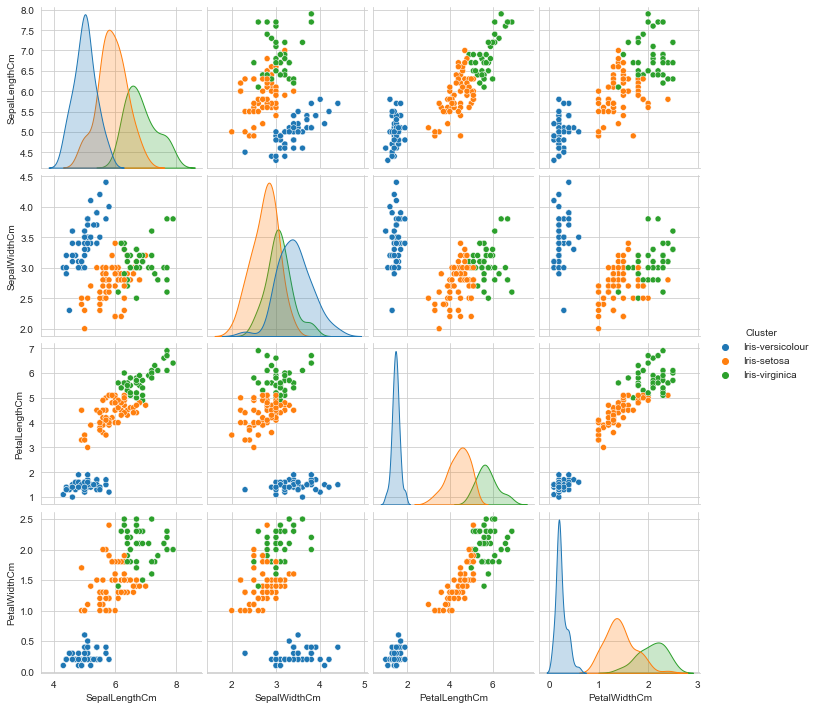

In [99]:
sns.set_style('whitegrid')   #Sets grid style
sns.pairplot(data_with_clusters,hue = 'Cluster');

In [101]:
data['cluster'] = kmeans.labels_
data['Species_encoded'] = data['Species'].apply(lambda x: 1 if x=='Iris-setosa' else 2 if x=='Iris-virginica' else 0)
print(classification_report(data['Species_encoded'],data['cluster']))

              precision    recall  f1-score   support

           0       0.77      0.96      0.86        50
           1       1.00      1.00      1.00        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150

